<a href="https://colab.research.google.com/github/uumair327/machine_learning/blob/main/ML3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Logistic Regression**

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load the dataset**

In [46]:
data = pd.read_csv('/content/weatherAUS.csv')

**Display first few rows**

In [47]:
print(data.head())

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7    

**Preprocess the data**

**Handle missing values**

In [48]:
data = data.dropna(subset=['RainTomorrow', 'MinTemp', 'MaxTemp', 'Rainfall'])

**Encode the target variable**

In [49]:
data['RainTomorrow'] = data['RainTomorrow'].apply(lambda x: 1 if x == 'Yes' else 0)

**Select the feature and target**

In [50]:
feature = 'MinTemp'
X = data[[feature]].values
y = data['RainTomorrow'].values

**Split the data into training and testing sets**

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Standardize the feature**

In [52]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Apply Logistic Regression**

In [53]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

**Predict on the test set**

In [54]:
y_pred = model.predict(X_test)


**Evaluate the model**

In [55]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.7782801123114262
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     32708
           1       0.00      0.00      0.00      9318

    accuracy                           0.78     42026
   macro avg       0.39      0.50      0.44     42026
weighted avg       0.61      0.78      0.68     42026



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Plot the confusion matrix**

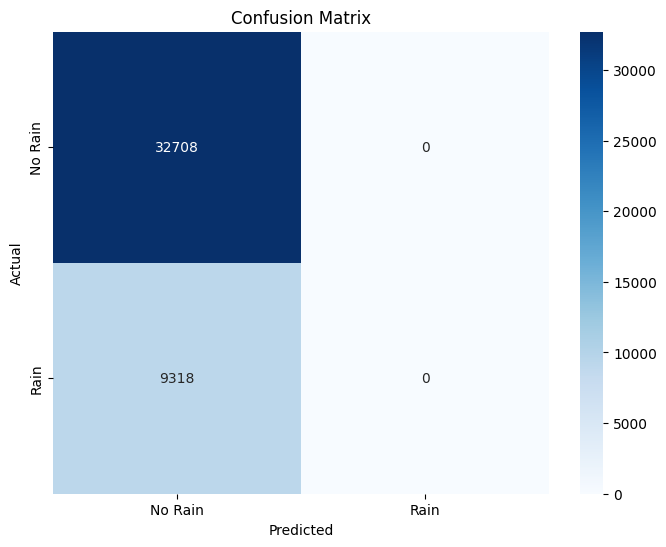

In [56]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Generate predictions for plotting**

In [59]:
X_test_plot = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_prob = model.predict_proba(scaler.transform(X_test_plot))[:, 1]

**Plot the logistic regression (sigmoid) curve**

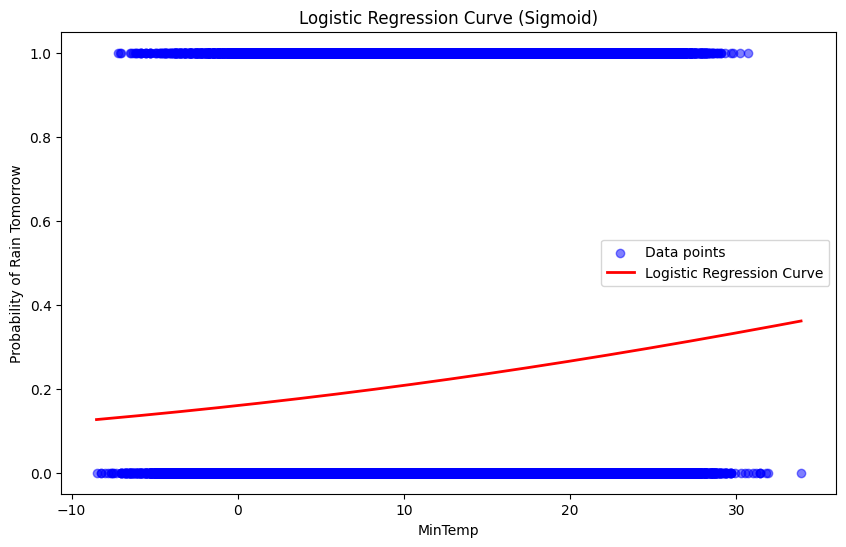

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points', alpha=0.5)
plt.plot(X_test_plot, y_prob, color='red', linewidth=2, label='Logistic Regression Curve')
plt.xlabel('MinTemp')
plt.ylabel('Probability of Rain Tomorrow')
plt.title('Logistic Regression Curve (Sigmoid)')
plt.legend()
plt.show()